# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohammad Al Muktabar
- **Email:** m.almuktabar11@gmail.com
- **ID Dicoding:** almuktabar

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda berdasarkan tipe pengguna pada tahun 2011 dan 2012 ?
- Bagaimana pola penyewaan sepeda berdasarkan kategori waktu pada tahun 2011 dan 2012 ?
- Bagaimana pengaruh perubahan hari dan musim terhadap jumlah penyewaan sepeda pada tahun 2011 hingga 2012 ?
- Bagaimana pengaruh situasi cuaca dan temperatur terhadap jumlah penyewaan sepeda selama tahun 2011 dan 2012 ?

## Import Semua Packages/Library yang Digunakan

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [56]:
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike-sharing-dataset/hour.csv')

In [57]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [58]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [59]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Insight:**
- Dataset terdiri dari 2 buah yaitu `day_df` (data penyewaan sepeda per harian) yang berjumlah 731 baris dengan 16 kolom dan `hour_df` (data penyewaan sepeda per jam) yang berjumlah 17379 baris dengan 17 kolom
- Keterangan masing-masing kolom:
    - instant: index dataset,
    - dteday :tanggal dataset,
    - season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
    - yr : tahun (0: 2011, 1: 2012)
    - mnth : bulan (1(januari) sampai 12(desember))
    - hr : jam (0(00.00) sampai 23(23.00))
    - holiday : hari libur (0: hari biasa, 1: hari libur)
    - weekday : hari dalam seminggu (0(minggu) sampai 6(sabtu))
    - workingday: hari kerja (0: akhir pekan, 1: hari kerja)
    - weathersit: kondisi cuaca (1: cerah sedikit berawan, 2: kabut disertai awan, 3: Hujan/Salju ringan, 4: kondisi cuaca ekstrem)
    - temp: suhu (celsius)
    - atemp: suhu yang dirasakan (celcius)
    - hum: kelembapan (%)
    - windspeed: kecepatan angin (km/h)
    - casual: jumlah pengguna biasa
    - registered: jumlah pengguna terdaftar
    - cnt: total antara pengguna biasa dan terdaftar



### Assessing Data

#### Menilai tabel `day_df`

In [61]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [63]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [64]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [65]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [66]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [67]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [68]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat tipe data yang belum sesuai pada kolom dteday
- kolom (temp, atemp, hum, windspeed) telah dinormalisasi dengan nilai maksimum masing masing kolom (41, 50, 100, 67)

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [69]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Mengembalikan kolom yang telah dinormalisasi (temp, atemp, hum, windspeed) ke bentuk aslinya

In [70]:
normalize_columns = ['temp', 'atemp', 'hum', 'windspeed']

for column in normalize_columns:
  if column == 'temp':
    day_df[column] *= 41
  elif column == 'atemp':
    day_df[column] *= 50
  elif column == 'hum':
    day_df[column] *= 100
  else:
    day_df[column] *= 67

day_df[normalize_columns].describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [71]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Mengembalikan kolom yang telah dinormalisasi (temp, atemp, hum, windspeed) ke bentuk aslinya

In [72]:
normalize_columns = ['temp', 'atemp', 'hum', 'windspeed']

for column in normalize_columns:
  if column == 'temp':
    hour_df[column] *= 41
  elif column == 'atemp':
    hour_df[column] *= 50
  elif column == 'hum':
    hour_df[column] *= 100
  else:
    hour_df[column] *= 67

hour_df[normalize_columns].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


**Insight:**
- Memperbaiki tipe data kolom dteday menjadi datetime
- Mengembalikan kolom (temp, atemp, hum, windspeed) ke nilai aslinya yaitu mengkalikan masing-masing kolom dengan nilai maksimum (41, 50, 100, 67)

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [73]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
# Jumlah pengguna pada tahun 2011 (0) dan 2012 (1)
day_df.groupby(by='yr').agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
    'cnt': 'sum'
}).round(0)

casual                       registered                             cnt
      min   max    mean     sum        min   max    mean      sum      sum
yr                                                                        
0       9  3065   677.0  247252        416  4614  2728.0   995851  1243103
1       2  3410  1018.0  372765         20  6946  4581.0  1676811  2049576

In [75]:
# Jumlah pengguna per bulan selama tahun 2011 dan 2012
day_df.groupby(by=['yr', 'mnth']).agg({
    'cnt': ['min', 'max', 'mean', 'sum']
}).round(0)

cnt                      
          min   max    mean     sum
yr mnth                            
0  1      431  1985  1232.0   38189
   2     1005  2927  1722.0   48215
   3      605  3239  2066.0   64045
   4      795  5312  3162.0   94870
   5     2633  5805  4381.0  135821
   6     3767  5515  4784.0  143512
   7     3285  6043  4559.0  141341
   8     1115  5895  4409.0  136691
   9     1842  5423  4247.0  127418
   10     627  5511  3984.0  123511
   11    1495  4486  3406.0  102167
   12     705  3940  2817.0   87323
1  1     1301  4521  3121.0   96744
   2     1529  5062  3556.0  103137
   3     3194  8362  5319.0  164875
   4     1027  7460  5807.0  174224
   5     2843  8294  6318.0  195865
   6     4127  8120  6761.0  202830
   7     4459  8173  6568.0  203607
   8     4549  7865  6919.0  214503
   9     4073  8714  7286.0  218573
   10      22  8156  6414.0  198841
   11    2277  6852  5089.0  152664
   12     441  6606  3991.0  123713

In [76]:
# Jumlah pengguna berdasarkan kondisi hari (kerja, akhir pekan, dan libur)
day_df.groupby(by=['yr', 'mnth', 'workingday', 'holiday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

casual  registered     cnt
yr mnth workingday holiday                            
0  1    0          0          1563        8617   10180
                   1           117         883    1000
        1          0          1393       25616   27009
   2    0          0          3428       10079   13507
                   1           195         912    1107
...                            ...         ...     ...
1  11   0          1          2052        6642    8694
        1          0          9271       96067  105338
   12   0          0          5878       28278   34156
                   1           440         573    1013
        1          0          6927       81617   88544

[66 rows x 3 columns]

In [77]:
# Jumlah pengguna berdasarkan kondisi hari (kerja, akhir pekan, dan libur)2
day_df.groupby(by= ['yr', 'weekday', 'workingday', 'holiday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['min', 'max', 'mean', 'sum']
}).round(0)

casual registered   cnt                      
                                 sum        sum   min   max    mean     sum
yr weekday workingday holiday                                              
0  0       0          0        59603     117471   605  5511  3405.0  177074
   1       0          1         8106      13927  1000  6043  3148.0   22033
           1          0        23454     134734  1321  5020  3515.0  158188
   2       1          0        23989     156349   683  5895  3468.0  180338
   3       1          0        20660     148509   506  5225  3253.0  169169
   4       0          1          560        935  1495  1495  1495.0    1495
           1          0        21880     151177   431  5515  3393.0  173057
   5       0          1         1082       5412  3126  3368  3247.0    6494
           1          0        28371     147141  1167  5538  3510.0  175512
   6       0          0        59547     120196   627  5923  3391.0  179743
1  0       0          0        80918     186035  1027  8227  5037.0  266953
   1       0          1         8654      28918  1951  6370  4696.0   37572
           1          0        30570     207140    22  7525  5282.0  237710
   2       0          1          440        573  1013  1013  1013.0    1013
           1          0        33414     254344  1096  7767  5642.0  287758
   3       0          1         2562       4841  7403  7403  7403.0    7403
           1          0        34097     262379   441  8173  5813.0  296476
   4       0          1          955       1470  2425  2425  2425.0    2425
           1          0        38065     270353  2114  7804  6047.0  308418
   5       1          0        48785     256999  3095  8362  5880.0  305784
   6       0          0        94305     203759  1301  8714  5732.0  298064

In [78]:
# Jumlah pengguna berdasarkan pergantian musim pada tahun 2011 dan 2012
day_df.groupby(by=['yr', 'season']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['min', 'max', 'mean', 'sum']
}).round(0)

casual registered   cnt                      
              sum        sum   min   max    mean     sum
yr season                                               
0  1        21425     128575   431  3239  1667.0  150000
   2        77564     269752   795  5805  3775.0  347316
   3        95450     324200  1115  6043  4464.0  419650
   4        52813     273324   627  5511  3664.0  326137
1  1        39197     282151   441  7836  3531.0  321348
   2       125958     445315  1027  8362  6209.0  571273
   3       130641     510838  4073  8714  6824.0  641479
   4        76969     438507    22  8555  5792.0  515476

### Explore `hour_df`

In [79]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [80]:
# Jumlah pengguna terbanyak per jam pada tahun 2011 dan 2012
hour_df.groupby(by= ['yr', 'hr']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(ascending=False, by='cnt').head(10)

casual  registered     cnt
yr hr                            
1  17   32747      176481  209228
   18   26430      166357  192787
   8     8792      156742  165534
   16   33095      109031  142126
   19   20980      120007  140987
0  17   21473      106159  127632
   18   18066       98919  116985
1  13   32561       83019  115580
   12   30712       84504  115216
   15   33743       80816  114559

In [81]:
# Jumlah pengguna dan kondisi temperatur berdasarkan situasi cuaca pertahun
hour_df.groupby(by = ['yr', 'weathersit']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).round(2)

temp  atemp    hum  windspeed  casual  registered      cnt
yr weathersit                                                             
0  1           20.57  24.03  59.08      12.71  183733      691320   875053
   2           19.31  22.69  70.76      12.31   53809      246710   300519
   3           18.42  21.47  84.13      14.95    9709       57786    67495
   4            9.02   9.85  93.00      22.00       1          35       36
1  1           21.33  24.80  55.71      12.82  279012     1184108  1463120
   2           19.59  22.96  69.05      11.82   80672      414761   495433
   3           19.09  22.25  81.09      14.31   13074       77762    90836
   4            6.97   9.09  86.00       9.50       7         180      187

**Insight:**
- Jumlah pengguna terdaftar lebih banyak dibandingkan pengguna biasa
- Secara keseluruhan rata-rata penyewa sepeda per bulan lebih banyak pada tahun 2012 dibandingkan tahun 2011
- Musim gugur merupakan musim paling banyak penyewaan sepeda
- Penyewaan sepeda terbanyak pada tahun 2011 dan 2012 ada pada jam 17.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda berdasarkan tipe pengguna pada tahun 2011 dan 2012 ?

In [82]:
month_resample = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
month_resample.index = month_resample.index.strftime('%B')
month_resample = month_resample.reset_index()
month_resample.rename(columns={
    "casual": "pengguna_biasa",
    "registered": "pengguna_terdaftar",
    "cnt": "jumlah_penyewa"
}, inplace=True)
month_resample.head()

<ipython-input-82-f122f679a293>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_resample = day_df.resample(rule='M', on='dteday').agg({


,dteday,pengguna_biasa,pengguna_terdaftar,jumlah_penyewa
0,January,3073,35116,38189
1,February,6242,41973,48215
2,March,12826,51219,64045
3,April,22346,72524,94870
4,May,31050,104771,135821


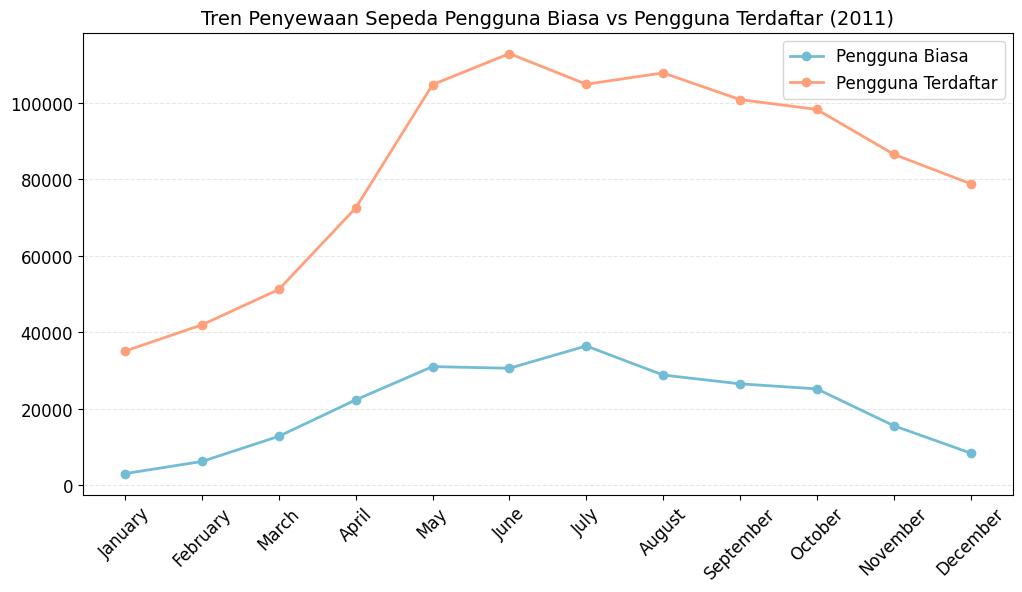

In [83]:
plt.figure(figsize=(12, 6))

# Plot pengguna biasa
plt.plot(
    month_resample.dteday[:12],
    month_resample.pengguna_biasa[:12],
    marker='o',
    linewidth=2,
    label='Pengguna Biasa',
    color='#72BCD4'
)

# Plot pengguna terdaftar
plt.plot(
    month_resample.dteday[:12],
    month_resample.pengguna_terdaftar[:12],
    marker='o',
    linewidth=2,
    label='Pengguna Terdaftar',
    color='#FFA07A'
)

plt.title("Tren Penyewaan Sepeda Pengguna Biasa vs Pengguna Terdaftar (2011)", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

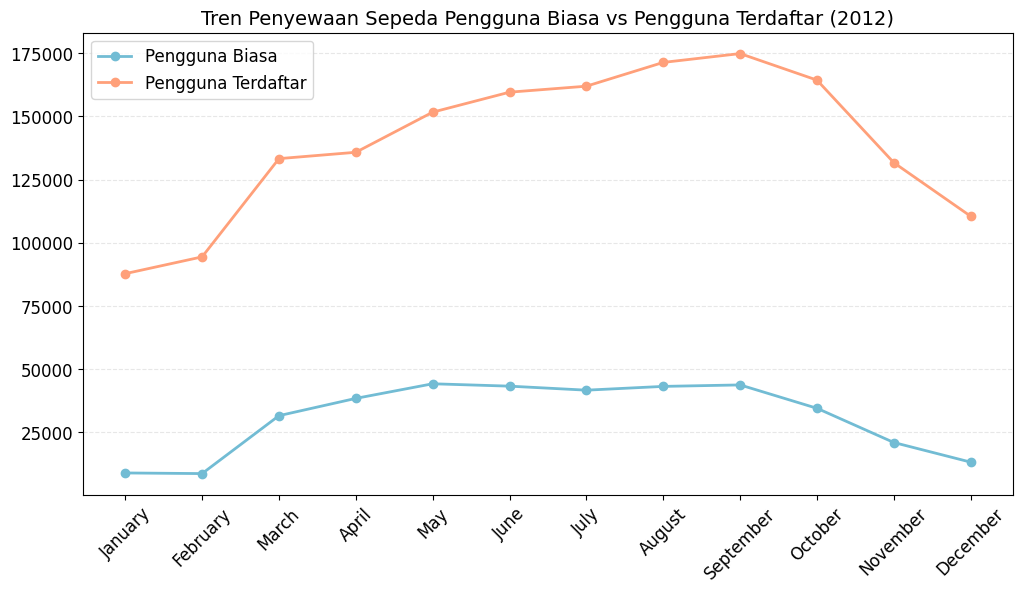

In [84]:
plt.figure(figsize=(12, 6))

# Plot pengguna biasa
plt.plot(
    month_resample.dteday[12:24],
    month_resample.pengguna_biasa[12:24],
    marker='o',
    linewidth=2,
    label='Pengguna Biasa',
    color='#72BCD4'
)

# Plot pengguna terdaftar
plt.plot(
    month_resample.dteday[12:24],
    month_resample.pengguna_terdaftar[12:24],
    marker='o',
    linewidth=2,
    label='Pengguna Terdaftar',
    color='#FFA07A'
)

plt.title("Tren Penyewaan Sepeda Pengguna Biasa vs Pengguna Terdaftar (2012)", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [85]:
yr_casual_registered = day_df.groupby(by='yr')[['casual', 'registered']].sum().reset_index()
yr_casual_registered['yr'] = yr_casual_registered['yr'].map({0: 2011, 1: 2012})

df_melted = yr_casual_registered.melt(id_vars='yr', var_name='Tipe Pengguna', value_name='Jumlah Penyewaan')
df_melted

,yr,Tipe Pengguna,Jumlah Penyewaan
0,2011,casual,247252
1,2012,casual,372765
2,2011,registered,995851
3,2012,registered,1676811


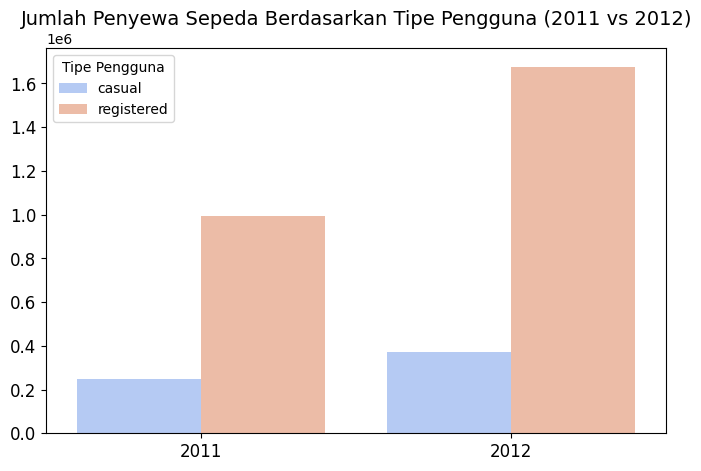

In [86]:
plt.figure(figsize=(8, 5))
sns.barplot(x='yr', y='Jumlah Penyewaan', hue='Tipe Pengguna', data=df_melted, palette='coolwarm')

plt.title("Jumlah Penyewa Sepeda Berdasarkan Tipe Pengguna (2011 vs 2012)", fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tipe Pengguna')

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan kategori waktu pada tahun 2011 dan 2012 ?

In [87]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


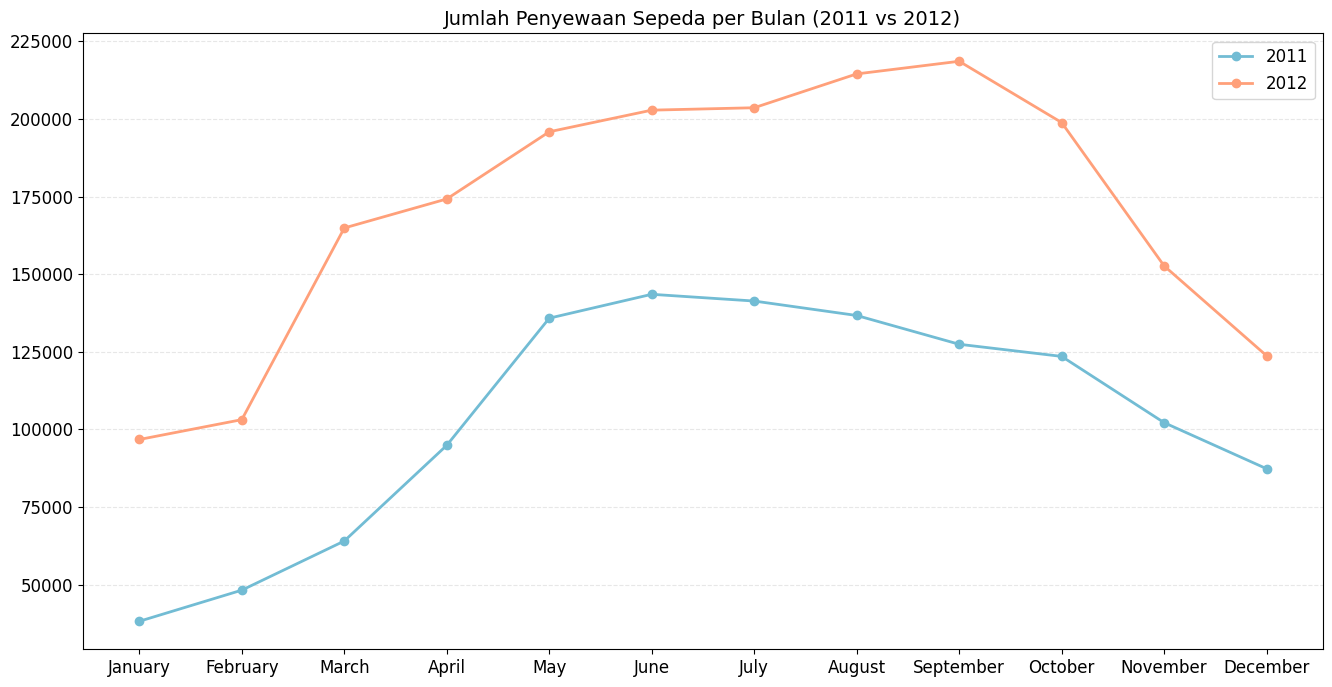

In [88]:
plt.figure(figsize=(16, 8))

# Plot 2011
plt.plot(
    month_resample.dteday[:12],
    month_resample.jumlah_penyewa[:12],
    marker='o',
    linewidth=2,
    label='2011',
    color='#72BCD4'
)

# Plot 2012
plt.plot(
    month_resample.dteday[12:24],
    month_resample.jumlah_penyewa[12:24],
    marker='o',
    linewidth=2,
    label='2012',
    color='#FFA07A'
)

plt.title("Jumlah Penyewaan Sepeda per Bulan (2011 vs 2012)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [89]:
yr_day_df = day_df.groupby(by=['yr', 'weekday']).cnt.sum().reset_index()
yr_day_df['yr'] = yr_day_df['yr'].map({0: 2011, 1: 2012})
yr_day_df['weekday'] = yr_day_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
yr_day_df.head()

,yr,weekday,cnt
0,2011,Minggu,177074
1,2011,Senin,180221
2,2011,Selasa,180338
3,2011,Rabu,169169
4,2011,Kamis,174552


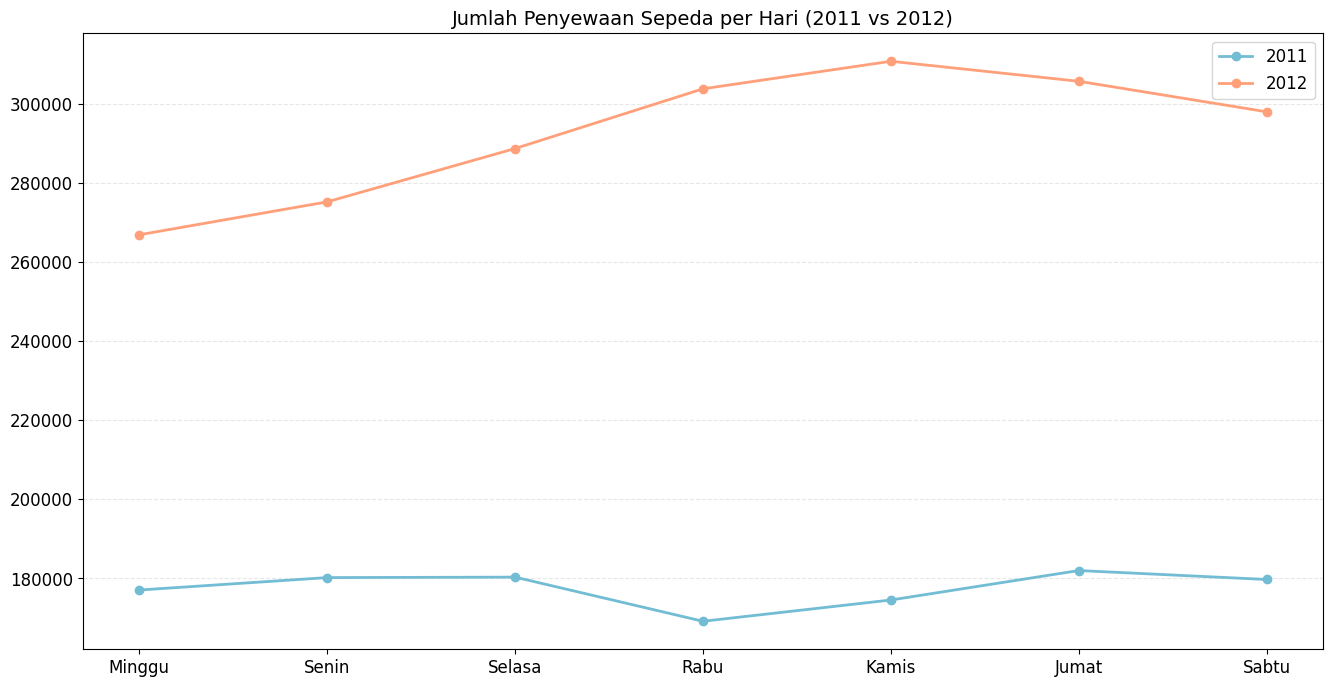

In [90]:
plt.figure(figsize=(16, 8))

# Plot 2011
plt.plot(
    yr_day_df.weekday[:7],
    yr_day_df.cnt[:7],
    marker='o',
    linewidth=2,
    label='2011',
    color='#72BCD4'
)

# Plot 2012
plt.plot(
    yr_day_df.weekday[7:14],
    yr_day_df.cnt[7:14],
    marker='o',
    linewidth=2,
    label='2012',
    color='#FFA07A'
)

plt.title("Jumlah Penyewaan Sepeda per Hari (2011 vs 2012)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [91]:
yr_hr_df = hour_df.groupby(by=['yr', 'hr']).cnt.sum().reset_index()
yr_hr_df['yr'] = yr_hr_df['yr'].map({0: 2011, 1: 2012})
yr_hr_df['hr'] = yr_hr_df['hr'].map(lambda h: f"{h%12 if h%12 else 12} {'AM' if h < 12 else 'PM'}")
yr_hr_df.head()

,yr,hr,cnt
0,2011,12 AM,15540
1,2011,1 AM,9558
2,2011,2 AM,6661
3,2011,3 AM,3441
4,2011,4 AM,1817


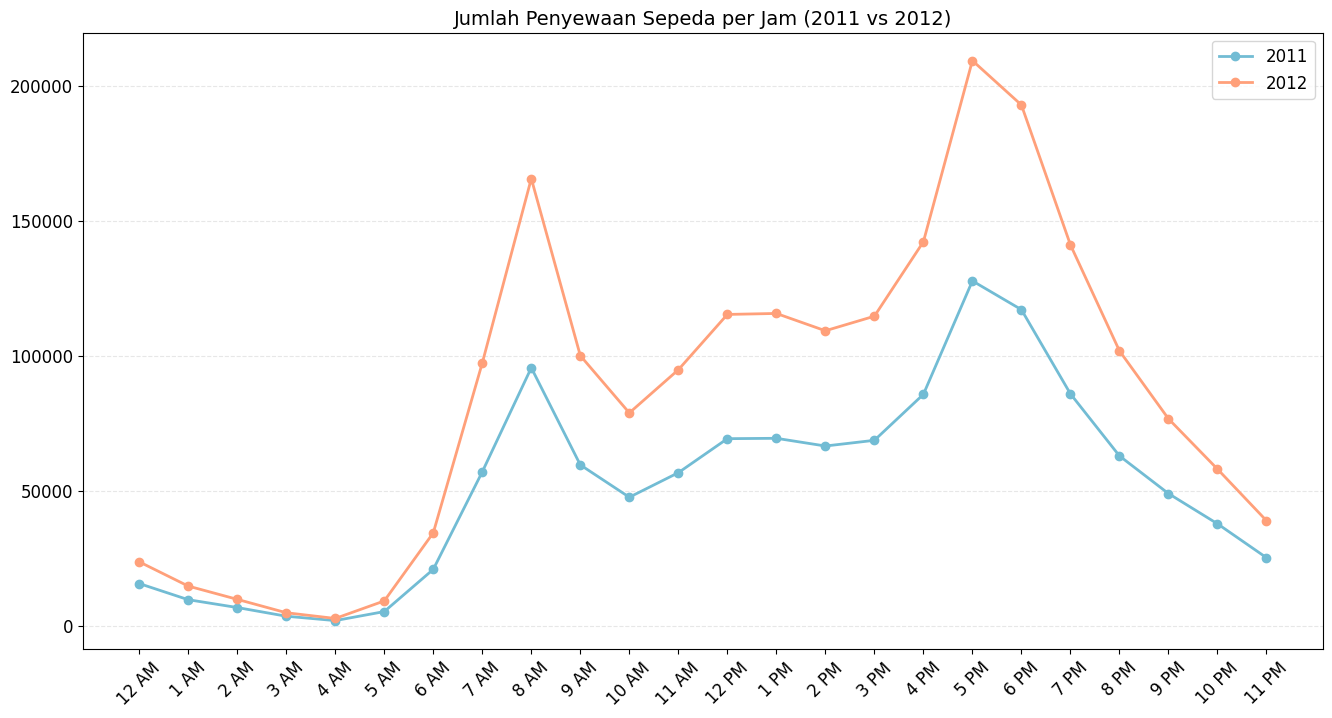

In [92]:
plt.figure(figsize=(16, 8))

# Plot 2011
plt.plot(
    yr_hr_df.hr[:24],
    yr_hr_df.cnt[:24],
    marker='o',
    linewidth=2,
    label='2011',
    color='#72BCD4'
)

# Plot 2012
plt.plot(
    yr_hr_df.hr[24:48],
    yr_hr_df.cnt[24:48],
    marker='o',
    linewidth=2,
    label='2012',
    color='#FFA07A'
)

plt.title("Jumlah Penyewaan Sepeda per Jam (2011 vs 2012)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh perubahan hari dan musim terhadap jumlah penyewaan sepeda pada tahun 2011 hingga 2012 ?

In [93]:
# Membuat kolom baru untuk mengelompokkan hari kerja, akhir pekan, dan hari libur
day_df['group_day'] = day_df.apply(
    lambda row: 1 if row['workingday'] == 0 and row['holiday'] == 0 else
                2 if row['workingday'] == 0 and row['holiday'] == 1 else
                2 if row['workingday'] == 1 and row['holiday'] == 1 else
                0, axis=1
)
"""
Ket:
    0: hari kerja
    1: akhir pekan
    2: hari libur
"""
group_day_df = day_df.groupby(by=['yr', 'group_day']).cnt.sum().reset_index()

group_day_df['yr'] = group_day_df['yr'].map({0: 2011, 1: 2012})
group_day_df

,yr,group_day,cnt
0,2011,0,856264
1,2011,1,356817
2,2011,2,30022
3,2012,0,1436146
4,2012,1,565017
5,2012,2,48413


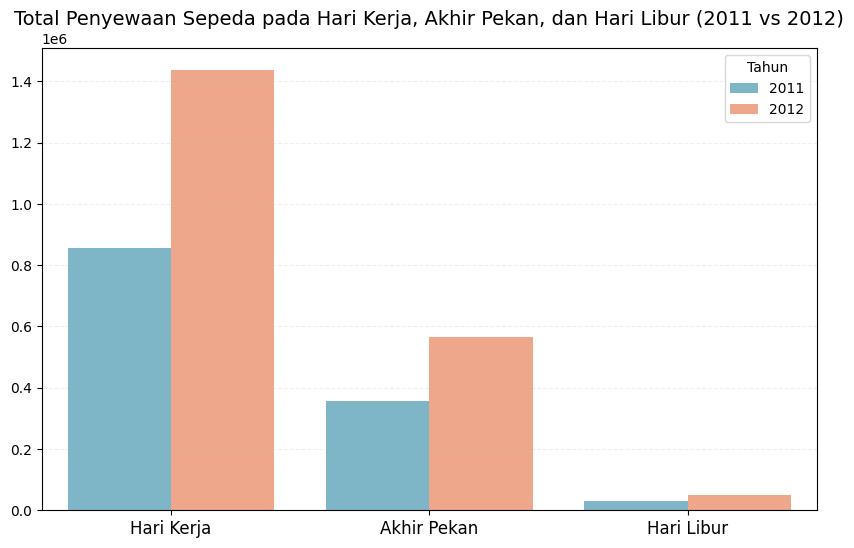

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_day_df, x='group_day', y='cnt', hue='yr', palette=['#72BCD4', '#FFA07A'])

plt.title("Total Penyewaan Sepeda pada Hari Kerja, Akhir Pekan, dan Hari Libur (2011 vs 2012)", fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=[0, 1, 2], labels=['Hari Kerja', 'Akhir Pekan', 'Hari Libur'], fontsize=12)
plt.legend(title='Tahun', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

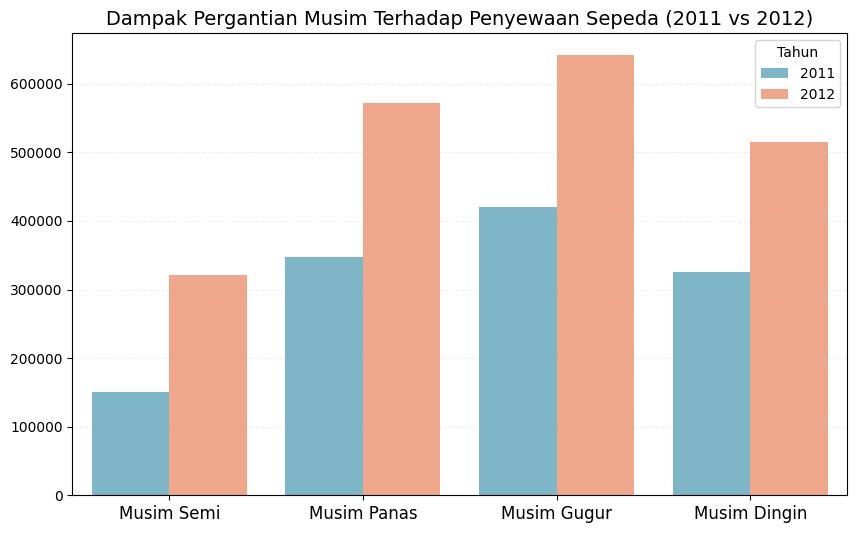

In [95]:
yr_season_df = day_df.groupby(by=['yr', 'season']).cnt.sum().reset_index()
yr_season_df['yr'] = yr_season_df['yr'].map({0: 2011, 1: 2012})

plt.figure(figsize=(10, 6))
sns.barplot(data=yr_season_df, x='season', y='cnt', hue='yr', palette=['#72BCD4', '#FFA07A'])

plt.title("Dampak Pergantian Musim Terhadap Penyewaan Sepeda (2011 vs 2012)", fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'], fontsize=12)
plt.legend(title='Tahun', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

### Pertanyaan 4: Bagaimana pengaruh situasi cuaca dan temperatur terhadap jumlah penyewaan sepeda selama tahun 2011 dan 2012 ?

In [96]:
yr_weather_df = hour_df.groupby(by=['yr', 'weathersit']).cnt.sum().reset_index()
yr_weather_df['yr'] = yr_weather_df['yr'].map({0: 2011, 1: 2012})
yr_weather_df['weathersit'] = yr_weather_df['weathersit'].map({1: 'Cerah Berawan', 2: 'Kabut Berawan', 3: 'Hujan/Salju Ringan', 4: 'Cuaca Ekstrem'})
yr_weather_df

,yr,weathersit,cnt
0,2011,Cerah Berawan,875053
1,2011,Kabut Berawan,300519
2,2011,Hujan/Salju Ringan,67495
3,2011,Cuaca Ekstrem,36
4,2012,Cerah Berawan,1463120
5,2012,Kabut Berawan,495433
6,2012,Hujan/Salju Ringan,90836
7,2012,Cuaca Ekstrem,187


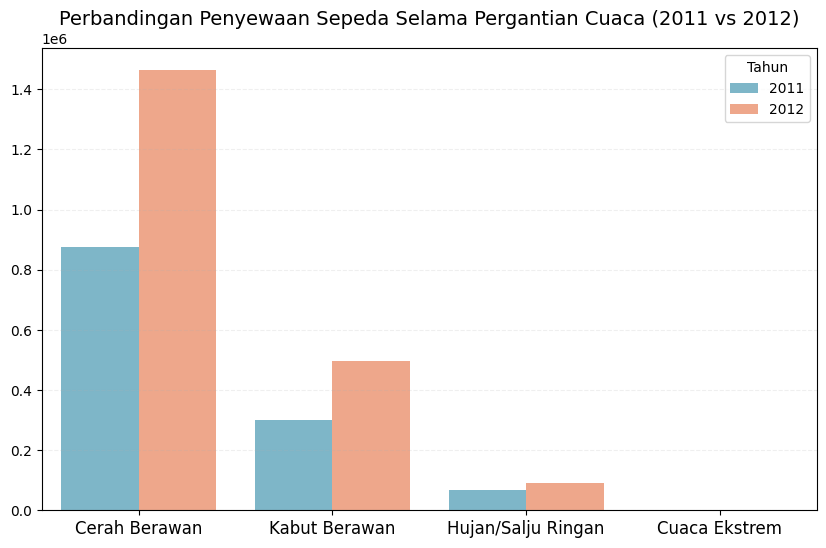

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=yr_weather_df, x='weathersit', y='cnt', hue='yr', palette=['#72BCD4', '#FFA07A'])

plt.title("Perbandingan Penyewaan Sepeda Selama Pergantian Cuaca (2011 vs 2012)", fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah Berawan', 'Kabut Berawan', 'Hujan/Salju Ringan', 'Cuaca Ekstrem'], fontsize=12)
plt.legend(title='Tahun', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

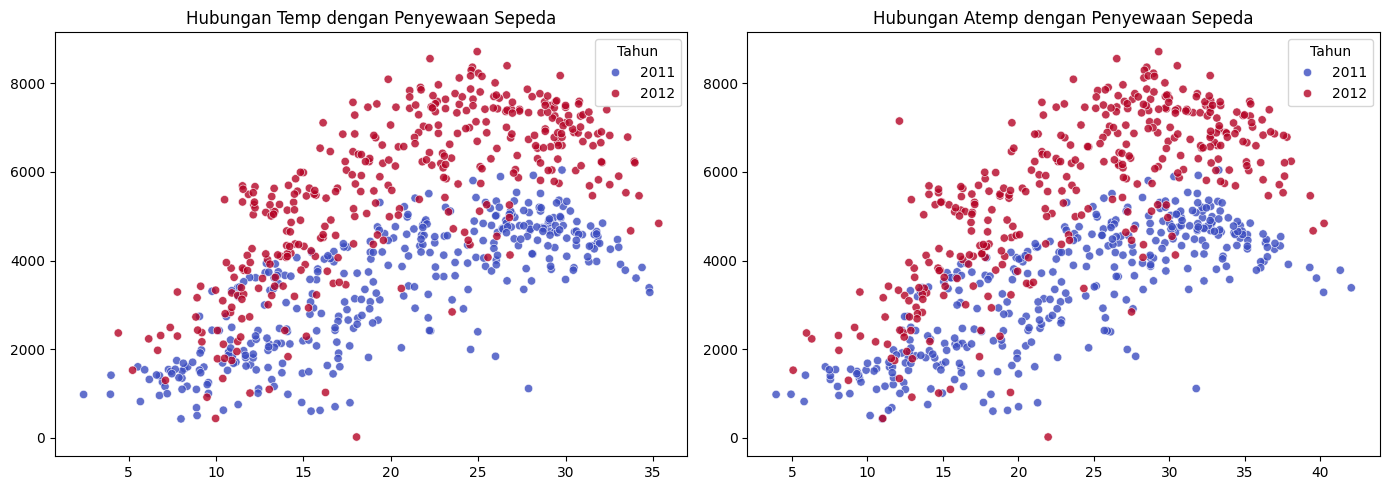

In [98]:
day_df['tahun'] = day_df['yr'].map({0: 2011, 1: 2012})
# Scatter plot suhu vs jumlah penyewaan sepeda
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], hue=day_df['tahun'], palette="coolwarm", alpha=0.8, ax=axes[0])
axes[0].set_title("Hubungan Temp dengan Penyewaan Sepeda")
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].legend(title="Tahun")

sns.scatterplot(x=day_df['atemp'], y=day_df['cnt'], hue=day_df['tahun'], palette="coolwarm", alpha=0.8, ax=axes[1])
axes[1].set_title("Hubungan Atemp dengan Penyewaan Sepeda")
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].legend(title="Tahun")

plt.tight_layout()
plt.show()

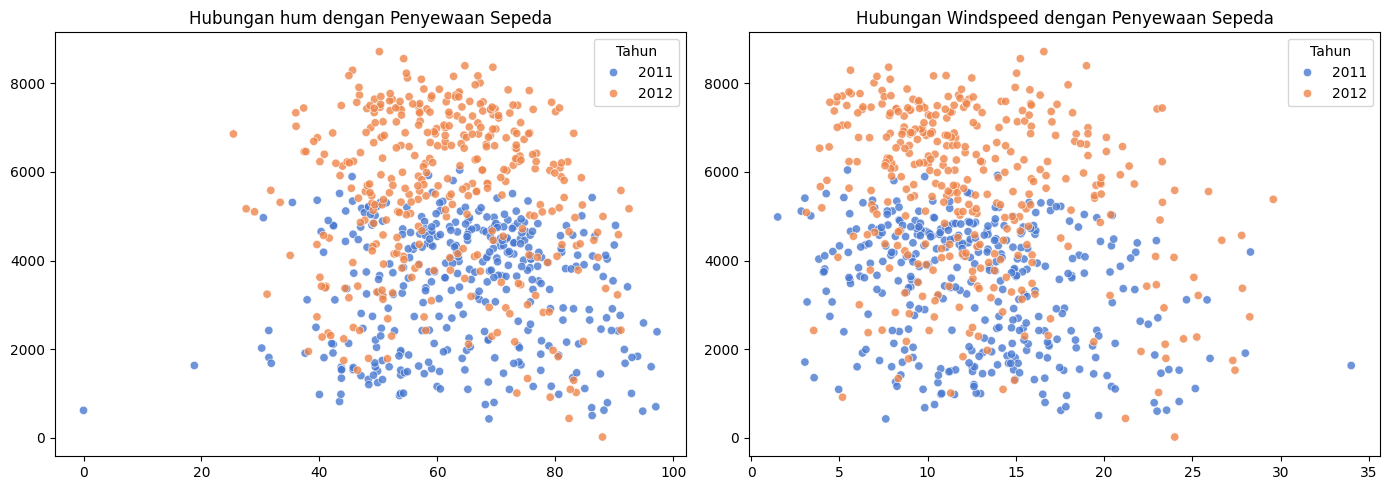

In [99]:
# Scatter plot suhu vs jumlah penyewaan sepeda
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=day_df['hum'], y=day_df['cnt'], hue=day_df['tahun'], palette="muted", alpha=0.8, ax=axes[0])
axes[0].set_title("Hubungan hum dengan Penyewaan Sepeda")
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].legend(title="Tahun")

sns.scatterplot(x=day_df['windspeed'], y=day_df['cnt'], hue=day_df['tahun'], palette="muted", alpha=0.8, ax=axes[1])
axes[1].set_title("Hubungan Windspeed dengan Penyewaan Sepeda")
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].legend(title="Tahun")

plt.tight_layout()
plt.show()

**Insight:**
- Pengguna terdaftar lebih banyak melakukan penyewaan sepeda setiap bulan dibandingkan pengguna biasa dalam rentang Waktu 2011 hingga 2012.
- Bulan juni merupakan total penyewaan sepeda terbanyak pada tahun 2011 sedangkan bulan September merupakan total penyewaan sepeda terbanyak pada tahun 2012 yang didominasi pada pukul 8 AM dan 5 PM.
- Hari kerja dan musim gugur menjadi hari dan musim terbanyak penyewa sepeda sedangkan hari libur dan musim semi menjadi hari dan musim yang paling sedikit penyewa sepeda selama tahun 2011 dan 2012
- Cuaca berawan sangat diminati para penyewa sepeda dengan suhu antara 20 - 30 °C sedangkan cuaca ekstrem dan suhu dibawah 10 °C menjadi kondisi paling sedikit penyewa sepeda


## Analisis Lanjutan Clustering

### Manual Grouping

#### Kategori berdasarkan jumlah penyewaan per hari

Tujuan: Untuk mengelompokkan penyewaan per hari ke dalam kategori yang mudah dipahami

kategori:
  
- Rendah: < 1000 penyewaan
- Sedang: 1000 - 5000 penyewaan
- Tinggi: > 5000 penyewaan

In [100]:
day_df['cnt'].describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


In [101]:
# Nilai kategori diambil dari rata-rata jumlah penyewa pada dataset day_df
def rental_categories(num):
  if num < 1000:
    return 'Rendah'
  elif 1000 <= num <= 5000:
    return 'Sedang'
  else:
    return 'Tinggi'

day_df['rental_categories'] = day_df['cnt'].apply(rental_categories)
day_df['rental_categories'].value_counts()

,count
rental_categories,
Sedang,427
Tinggi,286
Rendah,18


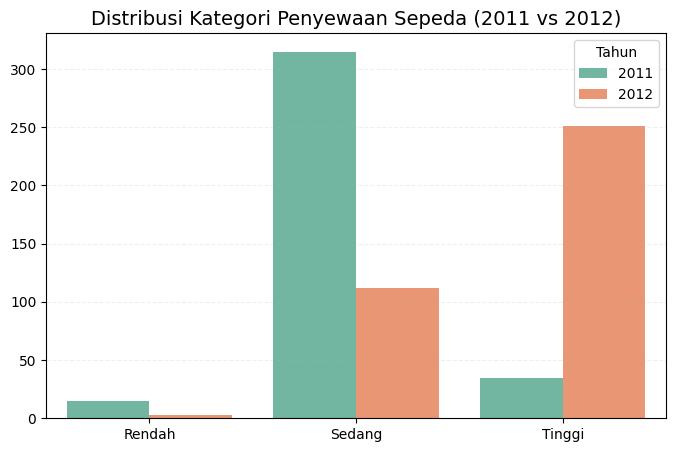

In [102]:
plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x='rental_categories', hue='tahun', palette='Set2')

plt.title("Distribusi Kategori Penyewaan Sepeda (2011 vs 2012)", fontsize=14)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

#### Kategori berdasarkan Waktu
Tujuan: Menunjukkan kapan waktu penyewaan tertinggi dalam satu hari.

In [103]:
def time_categories(num):
  if 0 <= num < 6:
    return 'Dini Hari'
  elif 6 <= num < 11:
    return 'Pagi'
  elif 11 <= num < 15:
    return 'Siang'
  elif 15 <= num < 18:
    return 'Sore'
  else:
    return 'Malam'

hour_df['time_categories'] = hour_df['hr'].apply(time_categories)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_categories
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16,Dini Hari
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40,Dini Hari
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32,Dini Hari
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13,Dini Hari
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1,Dini Hari


In [118]:
yr_time_df = hour_df.groupby(by=['yr', 'time_categories']).cnt.mean().reset_index().round(0)
yr_time_df['yr'] = yr_time_df['yr'].map({0: 2011, 1: 2012})
yr_time_df

,yr,time_categories,cnt
0,2011,Dini Hari,20.0
1,2011,Malam,173.0
2,2011,Pagi,155.0
3,2011,Siang,180.0
4,2011,Sore,258.0
5,2012,Dini Hari,30.0
6,2012,Malam,278.0
7,2012,Pagi,261.0
8,2012,Siang,298.0
9,2012,Sore,425.0


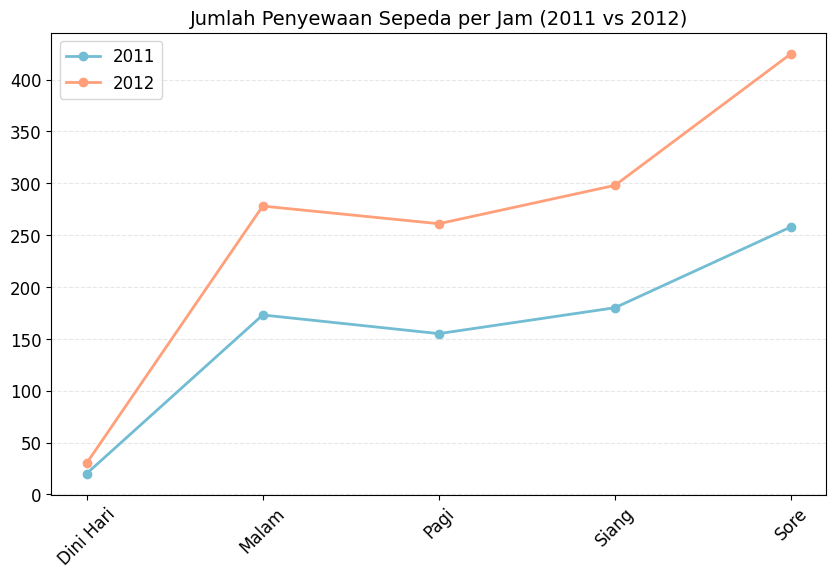

In [119]:
plt.figure(figsize=(10, 6))

# Plot 2011
plt.plot(
    yr_time_df.time_categories[:5],
    yr_time_df.cnt[:5],
    marker='o',
    linewidth=2,
    label='2011',
    color='#72BCD4'
)

# Plot 2012
plt.plot(
    yr_time_df.time_categories[5:10],
    yr_time_df.cnt[5:10],
    marker='o',
    linewidth=2,
    label='2012',
    color='#FFA07A'
)

plt.title("Jumlah Penyewaan Sepeda per Jam (2011 vs 2012)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

#### Kategori Jenis Pengguna
Tujuan: Memisahkan pengguna biasa dan pengguna terdaftar berdasarkan proporsi casual vs registered

In [107]:
def user_categories(row):
  if row['casual'] > row['registered']:
    return 'Mayoritas Pengguna Biasa'
  else:
    return 'Mayoritas Pengguna Terdaftar'

hour_df['user_categories'] = hour_df.apply(user_categories, axis=1)
hour_df['user_categories'].value_counts()

,count
user_categories,
Mayoritas Pengguna Terdaftar,17096
Mayoritas Pengguna Biasa,283


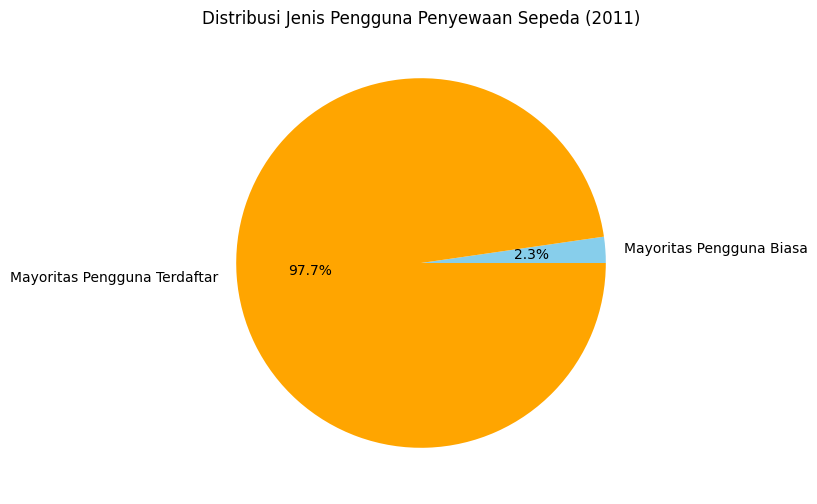

In [111]:
user_count_df = hour_df.groupby(['yr', 'user_categories']).cnt.count().unstack()

plt.figure(figsize=(6, 6))
user_count_df.loc[0].plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])

plt.title("Distribusi Jenis Pengguna Penyewaan Sepeda (2011)")
plt.ylabel(None)
plt.show()

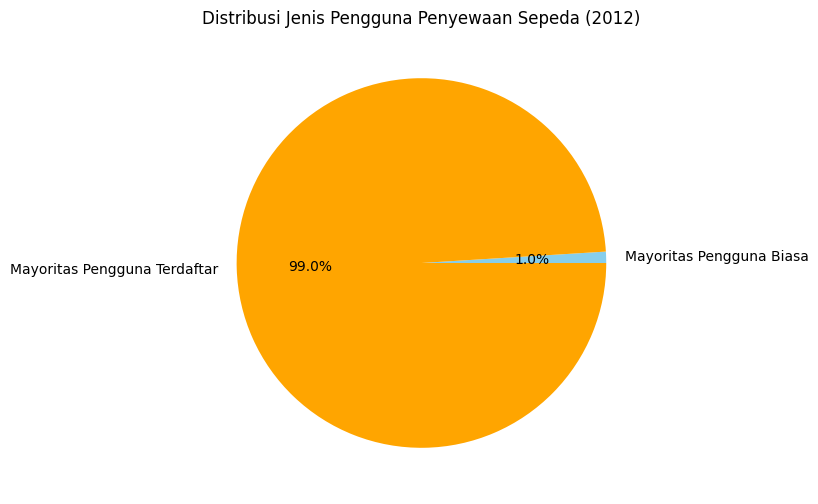

In [112]:
plt.figure(figsize=(6, 6))
user_count_df.loc[1].plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])

plt.title("Distribusi Jenis Pengguna Penyewaan Sepeda (2012)")
plt.ylabel(None)
plt.show()

In [113]:
day_df.to_csv("day_df.csv", index=False)
hour_df.to_csv("hour_df.csv", index=False)

## Conclusion

- Pengguna terdaftar secara konsisten mendominasi penyewaan sepeda sepanjang tahun 2011 dan 2012 dengan jumlah penyewa terbanyak ada pada tahun 2012 yang menunjukkan bahwa semakin banyak pengguna tetap menggunakan layanan ini dibandingkan pengguna biasa.
- Penyewaan sepeda menunjukkan pola yang cukup konsisten pada tahun 2011 dan 2012. Pukul 8 pagi dan 5 sore menjadi waktu dengan jumlah penyewaan tertinggi, yang kemungkinan berkaitan dengan aktivitas berangkat dan pulang kerja.
- Penyewaan sepeda lebih banyak terjadi pada hari kerja dan akhir pekan namun mengalami penurunan pada hari libur sedangkan perubahan musim relatif stabil dengan penurunan kecil pada musim semi, sementara musim panas, gugur, dan dingin masih memiliki jumlah penyewa yang cukup tinggi
- Kondisi cuaca memiliki dampak signifikan. Pengguna lebih sering menyewa dalam kondisi berawan dan menurun drastis saat kabut, hujan/salju ringan, serta cuaca ekstrem sedangkan temperatur secara umum tidak terlalu berpengaruh kecuali dalam kondisi tidak normal seperti dibawah 5°C atau diatas 35°C